# Small Representative Model for testing

## All solutions and code must be applicable to substantially larger dataset

### Unsupervised Multidimensional Panel Data

In [54]:
import pandas as pd
import numpy as np




#%matplotlib notebook to make interactive within same window as JN
#%matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

#SciKit Learn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.decomposition import PCA

#Plotly
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import scipy as sci
import statsmodels as stats

In [55]:
# Sample DF
#Russia has no dragons (dragons are all NaN)
#USA is missing most of its dragon info but not all
#There is a general increasing trend for everything
sample_data = [['USA', 'gdp', 2001, 10],
               ['USA', 'avgIQ', 2001, 100],
               ['USA', 'people', 2001, 1000],
               ['USA', 'dragons', 2001, 3],
               ['CHN', 'gdp', 2001, 12],
               ['CHN', 'avgIQ', 2001, 120],
               ['CHN', 'people', 2001, 2000],
               ['CHN', 'dragons', 2001, 1],
               ['RUS', 'gdp', 2001, 11],
               ['RUS', 'avgIQ', 2001, 105],
               ['RUS', 'people', 2001, 1500],
               ['RUS', 'dragons', 2001, np.nan],
               
               ['USA', 'gdp', 2002, 12],
               ['USA', 'avgIQ', 2002, 105],
               ['USA', 'people', 2002, 1200],
               ['USA', 'dragons', 2002, np.nan],
               ['CHN', 'gdp', 2002, 14],
               ['CHN', 'avgIQ', 2002, 127],
               ['CHN', 'people', 2002, 3100],
               ['CHN', 'dragons', 2002, 4],
               ['RUS', 'gdp', 2002, 11],
               ['RUS', 'avgIQ', 2002, 99],
               ['RUS', 'people', 2002, 1600],
               ['RUS', 'dragons', 2002, np.nan],
               
               ['USA', 'gdp', 2003, 15],
               ['USA', 'avgIQ', 2003, 115],
               ['USA', 'people', 2003, 2000],
               ['USA', 'dragons', 2003, np.nan],
               ['CHN', 'gdp', 2003, 16],
               ['CHN', 'avgIQ', 2003, 132],
               ['CHN', 'people', 2003, 4000],
               ['CHN', 'dragons', 2003, 6],
               ['RUS', 'gdp', 2003, 11],
               ['RUS', 'avgIQ', 2003, 108],
               ['RUS', 'people', 2003, 2000],
               ['RUS', 'dragons', 2003, np.nan],
               
               ['USA', 'gdp', 2004, 18],
               ['USA', 'avgIQ', 2004, 111],
               ['USA', 'people', 2004, 2500],
               ['USA', 'dragons', 2004, np.nan],
               ['CHN', 'gdp', 2004, 18],
               ['CHN', 'avgIQ', 2004, 140],
               ['CHN', 'people', 2004, np.nan],
               ['CHN', 'dragons', 2004, np.nan],
               ['RUS', 'gdp', 2004, 15],
               ['RUS', 'avgIQ', 2004, 103],
               ['RUS', 'people', 2004, 2800],
               ['RUS', 'dragons', 2004, 3],
               
               ['USA', 'gdp', 2005, 23],
               ['USA', 'avgIQ', 2005, 111],
               ['USA', 'people', 2005, 3700],
               ['USA', 'dragons', 2005, 8],
               ['CHN', 'gdp', 2005, 22],
               ['CHN', 'avgIQ', 2005, 143],
               ['CHN', 'people', 2005, 6000],
               ['CHN', 'dragons', 2005, 15],
               ['RUS', 'gdp', 2005, 17],
               ['RUS', 'avgIQ', 2005, np.nan],
               ['RUS', 'people', 2005, 3000],
               ['RUS', 'dragons', 2005, np.nan]]

sample_df = pd.DataFrame(sample_data, columns = ['A','B','C','D'])
#make float so that the MICE works later on...
sample_df['C'] = sample_df['C'].astype(float)
sample_df.head()

,A,B,C,D
0,USA,gdp,"2,001.00",10.00
1,USA,avgIQ,"2,001.00",100.00
2,USA,people,"2,001.00","1,000.00"
3,USA,dragons,"2,001.00",3.00
4,CHN,gdp,"2,001.00",12.00


In [56]:
pd.options.display.float_format = '{:,.2f}'.format

In [57]:
sample_df.head()

,A,B,C,D
0,USA,gdp,"2,001.00",10.00
1,USA,avgIQ,"2,001.00",100.00
2,USA,people,"2,001.00","1,000.00"
3,USA,dragons,"2,001.00",3.00
4,CHN,gdp,"2,001.00",12.00


In [58]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
A    60 non-null object
B    60 non-null object
C    60 non-null float64
D    50 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [59]:
sample_group = sample_df.groupby(['A', 'B'])

In [60]:
sample_group.groups

{('CHN', 'avgIQ'): Int64Index([5, 17, 29, 41, 53], dtype='int64'),
 ('CHN', 'dragons'): Int64Index([7, 19, 31, 43, 55], dtype='int64'),
 ('CHN', 'gdp'): Int64Index([4, 16, 28, 40, 52], dtype='int64'),
 ('CHN', 'people'): Int64Index([6, 18, 30, 42, 54], dtype='int64'),
 ('RUS', 'avgIQ'): Int64Index([9, 21, 33, 45, 57], dtype='int64'),
 ('RUS', 'dragons'): Int64Index([11, 23, 35, 47, 59], dtype='int64'),
 ('RUS', 'gdp'): Int64Index([8, 20, 32, 44, 56], dtype='int64'),
 ('RUS', 'people'): Int64Index([10, 22, 34, 46, 58], dtype='int64'),
 ('USA', 'avgIQ'): Int64Index([1, 13, 25, 37, 49], dtype='int64'),
 ('USA', 'dragons'): Int64Index([3, 15, 27, 39, 51], dtype='int64'),
 ('USA', 'gdp'): Int64Index([0, 12, 24, 36, 48], dtype='int64'),
 ('USA', 'people'): Int64Index([2, 14, 26, 38, 50], dtype='int64')}

In [61]:
#sample_group['D'].isnull().values.any() == True
sample_group['D'].apply(lambda x: x.isnull().values.any() == True).any()

True

In [62]:
sample_group.groups.keys()

dict_keys([('CHN', 'avgIQ'), ('CHN', 'dragons'), ('CHN', 'gdp'), ('CHN', 'people'), ('RUS', 'avgIQ'), ('RUS', 'dragons'), ('RUS', 'gdp'), ('RUS', 'people'), ('USA', 'avgIQ'), ('USA', 'dragons'), ('USA', 'gdp'), ('USA', 'people')])

# Imputation Loop

In [63]:
from impyute.imputation.cs import mice

In [64]:
#Current Imputation Loop on Sample Data

sample_group = sample_df.groupby(['A', 'B'])

#Suppress warnings
import warnings  

#ignore permanently...
warnings.filterwarnings('ignore')
#reset wanrnings
#warnings.resetwarnings()


d = pd.DataFrame([])

for group_index, group in sample_group:

        if group.isnull().values.any() == True:
            group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values
            d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))
                
        else:
            d = d.append(pd.DataFrame({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values}))
            continue

d = d.reset_index()
d = d.drop(columns = ['index'])
d['C'] = d['C'].astype(int)
d.head(100)

,A,B,C,D
0,CHN,avgIQ,2001,120.00
1,CHN,avgIQ,2002,127.00
2,CHN,avgIQ,2003,132.00
3,CHN,avgIQ,2004,140.00
4,CHN,avgIQ,2005,143.00
5,CHN,dragons,2001,1.00
6,CHN,dragons,2002,4.00
7,CHN,dragons,2003,6.00
8,CHN,dragons,2004,10.86
9,CHN,dragons,2005,15.00


### This (putting values into dictionary) could be faster
sample_group = sample_df.groupby(['A', 'B'])
d = []

for group_index, group in sample_group:

        if group.isnull().values.any() == True:
            group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values 
            d.append({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values})
        else: 
            d.append({'A': group.A.values, 'B': group.B.values, 'C': group.C.values, 'D': group.D.values})    
            continue
d = pd.DataFrame(d)
d.head(10)

### See Groups

sample_group = sample_df.groupby(['A', 'B'])

for group_index, group in sample_group:

    if group.isnull().values.any() == True:       
        group['D'] = ((mice(group.apply({'C': lambda x: x.values, 'D': lambda y: y.values})))[1]).values
        print(group)
    else:        
        print(group)
        continue
        

### Loop Practice
for group_index, group in sample_group:

    if 12 in group.values:
    
        print(group)
    else:
        #continue
        print('Checked group but could not satisfy condition', group_index)

for group_index, group in sample_group:

        #Each group is a tuple
    if 'USA' in group_index:
    
        print(group)
    else:
        continue
        #print('not working')

In [65]:
s_group1 = sample_group.get_group(('USA', 'dragons'))
s_group1.head()

,A,B,C,D
3,USA,dragons,"2,001.00",3.00
15,USA,dragons,"2,002.00",nan
27,USA,dragons,"2,003.00",nan
39,USA,dragons,"2,004.00",nan
51,USA,dragons,"2,005.00",8.00


In [66]:
s_group1.values

array([['USA', 'dragons', 2001.0, 3.0],
       ['USA', 'dragons', 2002.0, nan],
       ['USA', 'dragons', 2003.0, nan],
       ['USA', 'dragons', 2004.0, nan],
       ['USA', 'dragons', 2005.0, 8.0]], dtype=object)

In [67]:
s_group1['D'].isnull().values.any() == True

True

In [68]:
s_group1.apply({'C': lambda x: x.values, 'D': lambda y: y.values})
#s_group1.apply({'D': lambda x: x.values}) 

,C,D
0,"2,001.00",3.00
1,"2,002.00",nan
2,"2,003.00",nan
3,"2,004.00",nan
4,"2,005.00",8.00


In [69]:
d.head()

,A,B,C,D
0,CHN,avgIQ,2001,120.00
1,CHN,avgIQ,2002,127.00
2,CHN,avgIQ,2003,132.00
3,CHN,avgIQ,2004,140.00
4,CHN,avgIQ,2005,143.00


In [70]:
dd = d.to_dict()

In [71]:
dd

{'A': {0: 'CHN',
  1: 'CHN',
  2: 'CHN',
  3: 'CHN',
  4: 'CHN',
  5: 'CHN',
  6: 'CHN',
  7: 'CHN',
  8: 'CHN',
  9: 'CHN',
  10: 'CHN',
  11: 'CHN',
  12: 'CHN',
  13: 'CHN',
  14: 'CHN',
  15: 'CHN',
  16: 'CHN',
  17: 'CHN',
  18: 'CHN',
  19: 'CHN',
  20: 'RUS',
  21: 'RUS',
  22: 'RUS',
  23: 'RUS',
  24: 'RUS',
  25: 'RUS',
  26: 'RUS',
  27: 'RUS',
  28: 'RUS',
  29: 'RUS',
  30: 'RUS',
  31: 'RUS',
  32: 'RUS',
  33: 'RUS',
  34: 'RUS',
  35: 'RUS',
  36: 'RUS',
  37: 'RUS',
  38: 'RUS',
  39: 'RUS',
  40: 'USA',
  41: 'USA',
  42: 'USA',
  43: 'USA',
  44: 'USA',
  45: 'USA',
  46: 'USA',
  47: 'USA',
  48: 'USA',
  49: 'USA',
  50: 'USA',
  51: 'USA',
  52: 'USA',
  53: 'USA',
  54: 'USA',
  55: 'USA',
  56: 'USA',
  57: 'USA',
  58: 'USA',
  59: 'USA'},
 'B': {0: 'avgIQ',
  1: 'avgIQ',
  2: 'avgIQ',
  3: 'avgIQ',
  4: 'avgIQ',
  5: 'dragons',
  6: 'dragons',
  7: 'dragons',
  8: 'dragons',
  9: 'dragons',
  10: 'gdp',
  11: 'gdp',
  12: 'gdp',
  13: 'gdp',
  14: 'gdp',
  15

In [72]:
#Plot of original data

x_axis = d['C'].values
y_axis = d['D'].values
colors = d['A'].values
subplots = d['B'].values



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2759ef98>,
      dtype=object)

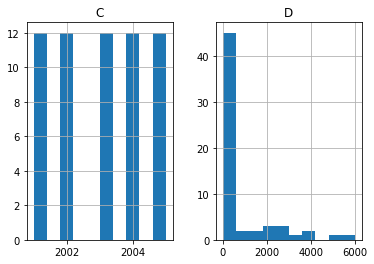

In [73]:
d.hist()

In [74]:
s = d.copy()
s = s.pivot_table(index = ['A', 'C'], columns = 'B', values= 'D')

In [75]:
ss = s.reset_index()
ss

B,A,C,avgIQ,dragons,gdp,people
0,CHN,2001,120.00,1.00,12.00,"2,000.00"
1,CHN,2002,127.00,4.00,14.00,"3,100.00"
2,CHN,2003,132.00,6.00,16.00,"4,000.00"
3,CHN,2004,140.00,10.86,18.00,"5,014.29"
4,CHN,2005,143.00,15.00,22.00,"6,000.00"
5,RUS,2001,105.00,3.00,11.00,"1,500.00"
6,RUS,2002,99.00,3.00,11.00,"1,600.00"
7,RUS,2003,108.00,3.00,11.00,"2,000.00"
8,RUS,2004,103.00,3.00,15.00,"2,800.00"
9,RUS,2005,104.50,3.00,17.00,"3,000.00"


In [76]:
s.head(100)

B         avgIQ  dragons   gdp   people
A   C                                  
CHN 2001 120.00     1.00 12.00 2,000.00
    2002 127.00     4.00 14.00 3,100.00
    2003 132.00     6.00 16.00 4,000.00
    2004 140.00    10.86 18.00 5,014.29
    2005 143.00    15.00 22.00 6,000.00
RUS 2001 105.00     3.00 11.00 1,500.00
    2002  99.00     3.00 11.00 1,600.00
    2003 108.00     3.00 11.00 2,000.00
    2004 103.00     3.00 15.00 2,800.00
    2005 104.50     3.00 17.00 3,000.00
USA 2001 100.00     3.00 10.00 1,000.00
    2002 105.00     4.25 12.00 1,200.00
    2003 115.00     5.50 15.00 2,000.00
    2004 111.00     6.75 18.00 2,500.00
    2005 111.00     8.00 23.00 3,700.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a277539e8>,
      dtype=object)

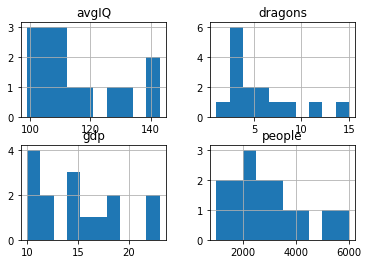

In [77]:
s.hist()

In [78]:
ss.head()

B,A,C,avgIQ,dragons,gdp,people
0,CHN,2001,120.00,1.00,12.00,"2,000.00"
1,CHN,2002,127.00,4.00,14.00,"3,100.00"
2,CHN,2003,132.00,6.00,16.00,"4,000.00"
3,CHN,2004,140.00,10.86,18.00,"5,014.29"
4,CHN,2005,143.00,15.00,22.00,"6,000.00"


B    A     C  avgIQ  dragons   gdp   people
0  CHN  2001 120.00     1.00 12.00 2,000.00
1  CHN  2002 127.00     4.00 14.00 3,100.00
2  CHN  2003 132.00     6.00 16.00 4,000.00
3  CHN  2004 140.00    10.86 18.00 5,014.29
4  CHN  2005 143.00    15.00 22.00 6,000.00
B    A     C  avgIQ  dragons   gdp   people
5  RUS  2001 105.00     3.00 11.00 1,500.00
6  RUS  2002  99.00     3.00 11.00 1,600.00
7  RUS  2003 108.00     3.00 11.00 2,000.00
8  RUS  2004 103.00     3.00 15.00 2,800.00
9  RUS  2005 104.50     3.00 17.00 3,000.00
B     A     C  avgIQ  dragons   gdp   people
10  USA  2001 100.00     3.00 10.00 1,000.00
11  USA  2002 105.00     4.25 12.00 1,200.00
12  USA  2003 115.00     5.50 15.00 2,000.00
13  USA  2004 111.00     6.75 18.00 2,500.00
14  USA  2005 111.00     8.00 23.00 3,700.00


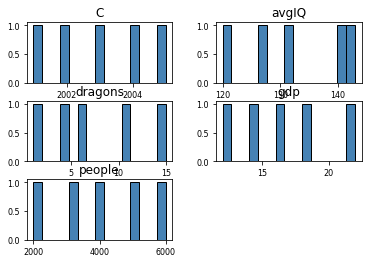

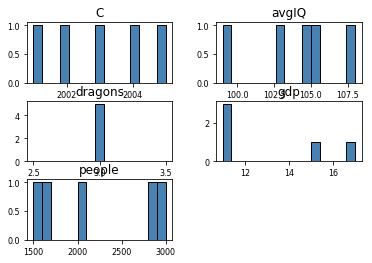

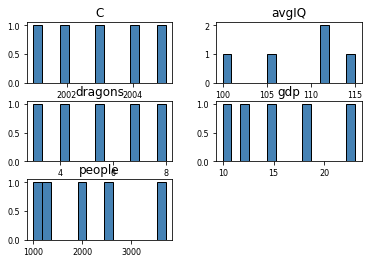

In [79]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:
    
    print(group)
    
    #group.hist()
    group.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)


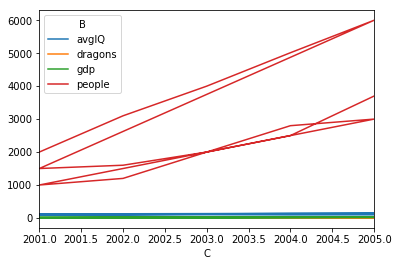

In [80]:
ss.plot(x = 'C')

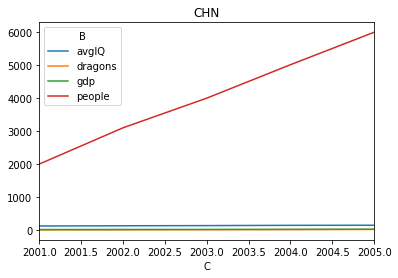

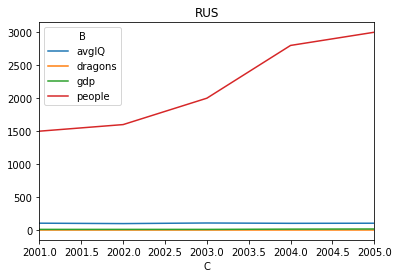

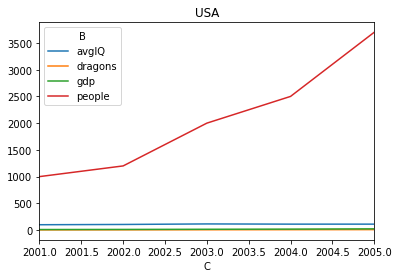

In [81]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:
    
    group.plot(x = 'C', title = _)

numpy.ndarray

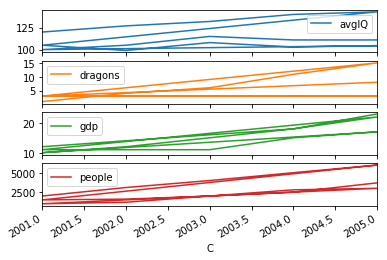

In [82]:
ss_subs = ss.plot.line(x = 'C', subplots = 'A')
type(ss_subs)

numpy.ndarray

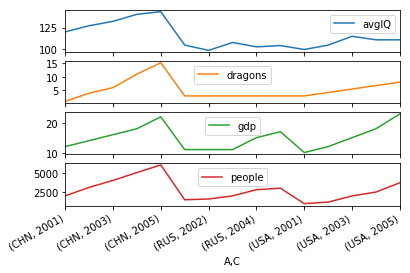

In [83]:
axes = s.plot.line(subplots=True)
type(axes)

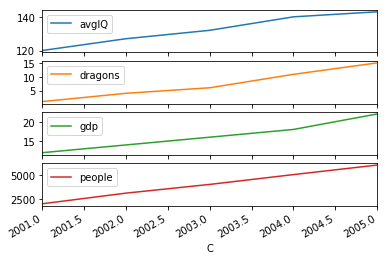

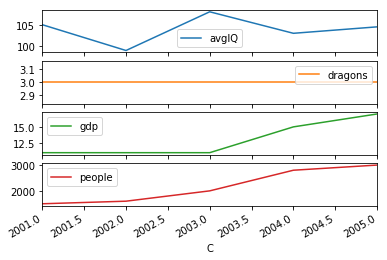

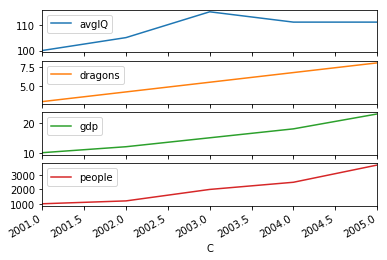

In [84]:
grouped_s = ss.groupby(['A'])

for _, group in grouped_s:

    group.plot.line(x = 'C', subplots=True)
    type(group)

In [85]:
s.head()

B         avgIQ  dragons   gdp   people
A   C                                  
CHN 2001 120.00     1.00 12.00 2,000.00
    2002 127.00     4.00 14.00 3,100.00
    2003 132.00     6.00 16.00 4,000.00
    2004 140.00    10.86 18.00 5,014.29
    2005 143.00    15.00 22.00 6,000.00

In [86]:
#Scaling

sa = s.values #returns a numpy array, can also use to_numpy
min_max_scaler = preprocessing.MinMaxScaler()
sa_scaled = min_max_scaler.fit_transform(sa)
s2 = pd.DataFrame(sa_scaled, columns = s.columns, index = s.index)
s2.head(20)

B         avgIQ  dragons  gdp  people
A   C                                
CHN 2001   0.48     0.00 0.15    0.20
    2002   0.64     0.21 0.31    0.42
    2003   0.75     0.36 0.46    0.60
    2004   0.93     0.70 0.62    0.80
    2005   1.00     1.00 0.92    1.00
RUS 2001   0.14     0.14 0.08    0.10
    2002   0.00     0.14 0.08    0.12
    2003   0.20     0.14 0.08    0.20
    2004   0.09     0.14 0.38    0.36
    2005   0.12     0.14 0.54    0.40
USA 2001   0.02     0.14 0.00    0.00
    2002   0.14     0.23 0.15    0.04
    2003   0.36     0.32 0.38    0.20
    2004   0.27     0.41 0.62    0.30
    2005   0.27     0.50 1.00    0.54

In [87]:
s_df = pd.DataFrame(s.values)
s_df
#Note that column 0 at 13 and 14 are the same so this is inplace

,0,1,2,3
0,120.00,1.00,12.00,"2,000.00"
1,127.00,4.00,14.00,"3,100.00"
2,132.00,6.00,16.00,"4,000.00"
3,140.00,10.86,18.00,"5,014.29"
4,143.00,15.00,22.00,"6,000.00"
5,105.00,3.00,11.00,"1,500.00"
6,99.00,3.00,11.00,"1,600.00"
7,108.00,3.00,11.00,"2,000.00"
8,103.00,3.00,15.00,"2,800.00"
9,104.50,3.00,17.00,"3,000.00"


In [88]:
#Plot scaled values



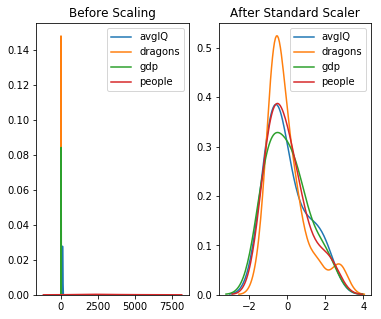

,avgIQ,dragons,gdp,people
0,0.37,-1.21,-0.77,-0.55
1,0.87,-0.36,-0.26,0.25
2,1.23,0.20,0.26,0.90
3,1.81,1.57,0.77,1.64
4,2.03,2.74,1.80,2.35


In [89]:

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(s)

scaled_df = pd.DataFrame(scaled_df, columns = ['avgIQ','dragons','gdp','people'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()



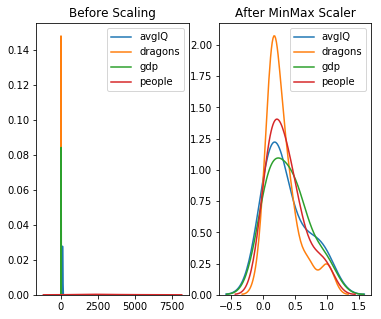

,avgIQ,dragons,gdp,people
0,0.48,0.00,0.15,0.20
1,0.64,0.21,0.31,0.42
2,0.75,0.36,0.46,0.60
3,0.93,0.70,0.62,0.80
4,1.00,1.00,0.92,1.00


In [90]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(s)
scaled_df = pd.DataFrame(scaled_df, columns = ['avgIQ','dragons','gdp','people'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()

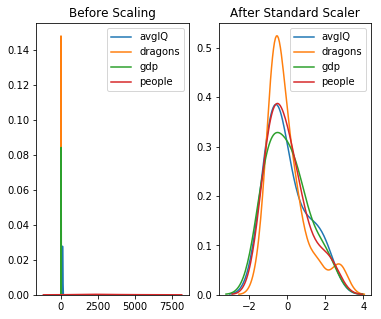

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35

In [91]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(s)
scaled_df = pd.DataFrame(scaled_df, columns = s.columns, index = s.index)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(s['avgIQ'], ax=ax1)
sns.kdeplot(s['dragons'], ax=ax1)
sns.kdeplot(s['gdp'], ax=ax1)
sns.kdeplot(s['people'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['avgIQ'], ax=ax2)
sns.kdeplot(scaled_df['dragons'], ax=ax2)
sns.kdeplot(scaled_df['gdp'], ax=ax2)
sns.kdeplot(scaled_df['people'], ax=ax2)

plt.show()
scaled_df.head()



In [92]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

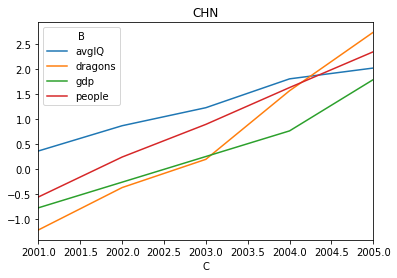

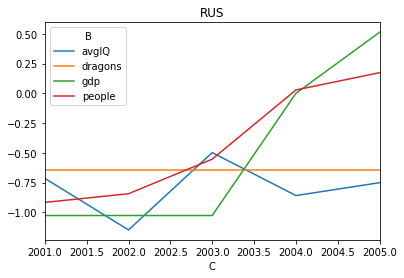

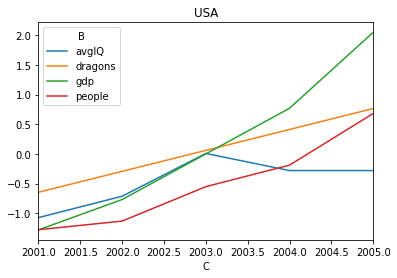

In [93]:
grouped_s = scaled_df.reset_index().groupby(['A'])

for group_name, group in grouped_s:
    
    group.plot(x = 'C', title = group_name)

In [94]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

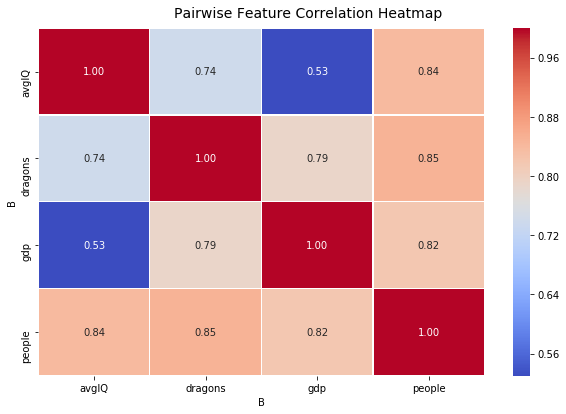

In [95]:

f, ax = plt.subplots(figsize=(10, 6))
corr = scaled_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pairwise Feature Correlation Heatmap', fontsize=14)

In [96]:
scaled_df

B         avgIQ  dragons   gdp  people
A   C                                 
CHN 2001   0.37    -1.21 -0.77   -0.55
    2002   0.87    -0.36 -0.26    0.25
    2003   1.23     0.20  0.26    0.90
    2004   1.81     1.57  0.77    1.64
    2005   2.03     2.74  1.80    2.35
RUS 2001  -0.71    -0.65 -1.03   -0.92
    2002  -1.15    -0.65 -1.03   -0.84
    2003  -0.50    -0.65 -1.03   -0.55
    2004  -0.86    -0.65  0.00    0.03
    2005  -0.75    -0.65  0.51    0.17
USA 2001  -1.07    -0.65 -1.28   -1.28
    2002  -0.71    -0.29 -0.77   -1.13
    2003   0.01     0.06  0.00   -0.55
    2004  -0.28     0.41  0.77   -0.19
    2005  -0.28     0.77  2.05    0.68

In [97]:
# total pca.explained_variance_ratio should be above 85%

pca = PCA(.95)
pca.fit(scaled_df)
pca.n_components_
print(pca.explained_variance_ratio_)
pca.transform(scaled_df)


[0.82313391 0.11774398 0.04392776]


array([[-1.11123527, -0.87960395,  0.62610641],
       [ 0.2340706 , -0.86155587,  0.45467909],
       [ 1.28862355, -0.75923787,  0.44724959],
       [ 2.90406472, -0.73344199, -0.18056533],
       [ 4.47949515, -0.11879039, -0.52618489],
       [-1.64861597, -0.18490086, -0.25397801],
       [-1.81418745,  0.12376403, -0.30000442],
       [-1.35242015, -0.36618147, -0.08754912],
       [-0.72236509,  0.55115893,  0.417313  ],
       [-0.34869235,  0.81058542,  0.66566089],
       [-2.1354241 , -0.07290721, -0.53352651],
       [-1.46125257,  0.04117027, -0.54334785],
       [-0.26147109,  0.03835443, -0.2475451 ],
       [ 0.34503383,  0.78188824, -0.19820705],
       [ 1.6043762 ,  1.6296983 ,  0.25989928]])

pca = PCA(.95)
principalComponenets = pca.fit_transform(scaled_df)


In [98]:
#Number of components used that keep 95%
pca.n_components_

3

In [99]:
print(pca.explained_variance_ratio_)

[0.82313391 0.11774398 0.04392776]


In [100]:
pca.transform(scaled_df)

array([[-1.11123527, -0.87960395,  0.62610641],
       [ 0.2340706 , -0.86155587,  0.45467909],
       [ 1.28862355, -0.75923787,  0.44724959],
       [ 2.90406472, -0.73344199, -0.18056533],
       [ 4.47949515, -0.11879039, -0.52618489],
       [-1.64861597, -0.18490086, -0.25397801],
       [-1.81418745,  0.12376403, -0.30000442],
       [-1.35242015, -0.36618147, -0.08754912],
       [-0.72236509,  0.55115893,  0.417313  ],
       [-0.34869235,  0.81058542,  0.66566089],
       [-2.1354241 , -0.07290721, -0.53352651],
       [-1.46125257,  0.04117027, -0.54334785],
       [-0.26147109,  0.03835443, -0.2475451 ],
       [ 0.34503383,  0.78188824, -0.19820705],
       [ 1.6043762 ,  1.6296983 ,  0.25989928]])

In [101]:
#Note the 15 entries. Same amount of indeces as before
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns = ['pc1','pc2','pc3'])
#pc3 only gives .04 so it really is not worth keeping
pca_df = pca_df.drop(columns = 'pc3')
pca_df.head(20)

,pc1,pc2
0,-1.11,-0.88
1,0.23,-0.86
2,1.29,-0.76
3,2.90,-0.73
4,4.48,-0.12
5,-1.65,-0.18
6,-1.81,0.12
7,-1.35,-0.37
8,-0.72,0.55
9,-0.35,0.81


In [102]:
principalComponents = pca_df.to_numpy()
principalComponents

array([[-1.11123527, -0.87960395],
       [ 0.2340706 , -0.86155587],
       [ 1.28862355, -0.75923787],
       [ 2.90406472, -0.73344199],
       [ 4.47949515, -0.11879039],
       [-1.64861597, -0.18490086],
       [-1.81418745,  0.12376403],
       [-1.35242015, -0.36618147],
       [-0.72236509,  0.55115893],
       [-0.34869235,  0.81058542],
       [-2.1354241 , -0.07290721],
       [-1.46125257,  0.04117027],
       [-0.26147109,  0.03835443],
       [ 0.34503383,  0.78188824],
       [ 1.6043762 ,  1.6296983 ]])

In [103]:
finalDf = pd.concat([pca_df, scaled_df.reset_index()[['A']]], axis = 1)
finalDf

,pc1,pc2,A
0,-1.11,-0.88,CHN
1,0.23,-0.86,CHN
2,1.29,-0.76,CHN
3,2.90,-0.73,CHN
4,4.48,-0.12,CHN
5,-1.65,-0.18,RUS
6,-1.81,0.12,RUS
7,-1.35,-0.37,RUS
8,-0.72,0.55,RUS
9,-0.35,0.81,RUS


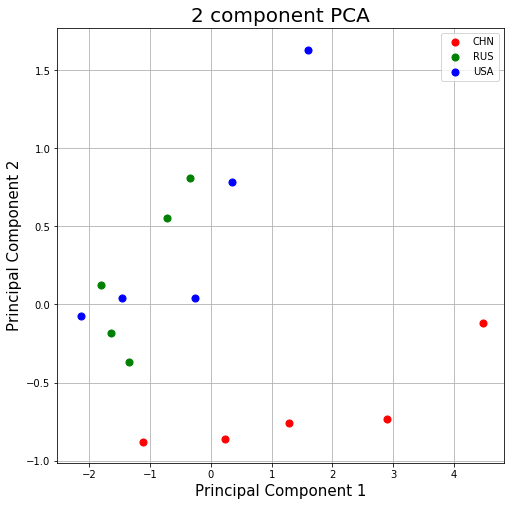

In [104]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['CHN', 'RUS', 'USA']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['A'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()